In [1]:
%matplotlib inline
import os, pickle, string
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from statannotations.Annotator import Annotator

font_path = "/home/zhoujb/local/font/Times New Roman.ttf"
mpl.font_manager.fontManager.addfont(font_path)
prop = mpl.font_manager.FontProperties(fname=font_path)
mpl.rcParams['font.family'] = prop.get_name()
mpl.rcParams['font.sans-serif'] = ["Times New Roman"]
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['pdf.fonttype'] = 42

RAW_PATH = "/data2/zhoujb/project/cowpea_project/rawData/"
SNP_PATH = "/data2/zhoujb/project/cowpea_project/basedXPXLR/snpDir/"
CLUSTER_PATH = "/data2/zhoujb/project/cowpea_project/basedXPXLR/SNPMMSeqCluster/"
RES_PATH = "/data2/zhoujb/project/cowpea_project/basedXPXLR/Result/"
FIG_PATH = "/data2/zhoujb/project/cowpea_project/basedXPXLR/plotFigure/"

NEW_RES_PATH = "/data2/zhoujb/project/cowpea_project/basedXPXLR/offspring/12/Result/"

In [83]:
lp012_pl = pd.read_excel(os.path.join(RAW_PATH, "LP012-ZJ618.xlsx"), sheet_name="PL")
lp012_pl["Sample_name"] = "P" + lp012_pl["Sample"].str[2:]
lp012_pl = lp012_pl.set_index("Sample_name")

lp012_pc = pd.read_excel(os.path.join(RAW_PATH, "LP012-ZJ618.xlsx"), sheet_name="PC", index_col="Sample")
lp012_pc = lp012_pc[~lp012_pc.index.duplicated(keep='first')]

lp012_psu = pd.read_excel(os.path.join(RAW_PATH, "LP012-ZJ618.xlsx"), sheet_name="PSugar", index_col="Sample")
lp012_psu = lp012_psu[~lp012_psu.index.duplicated(keep='first')]

lp012_pst = pd.read_excel(os.path.join(RAW_PATH, "LP012-ZJ618.xlsx"), sheet_name="PStarch", index_col="Sample")
lp012_pst = lp012_pst[~lp012_pst.index.duplicated(keep='first')]

sample_score_info = pd.read_table(os.path.join(NEW_RES_PATH, "Samples_Score_Info_four.tsv"))
sample_score_info["Sample_name"] = "P" + sample_score_info["Sample"]
sample_score_info["Sample_name"] = sample_score_info["Sample_name"].str.replace("_", "-", regex=False)
sample_score_info = sample_score_info.set_index("Sample_name")

data_con = pd.concat([sample_score_info, lp012_pl, lp012_pc, lp012_psu, lp012_pst], axis=1)
data_con = data_con.rename(columns={'Hap_Score.by_Total_pop':'Total_score', 
                                    'Hap_Score.by_VL_pop':'VL_score',
                                    'Hap_Score.by_G_pop':'G_score',
                                    'Hap_Score.by_VC_pop':'VC_score'})
data_con = data_con.sort_values(by="Total_score")

data_con[['Total_score', 'PL','PC', 'PSugar', 'PStarch']].to_excel("./LP012×ZJ618_score.xlsx")

Text(0.05, 0.8, 'r=0.305, p=0.00821')

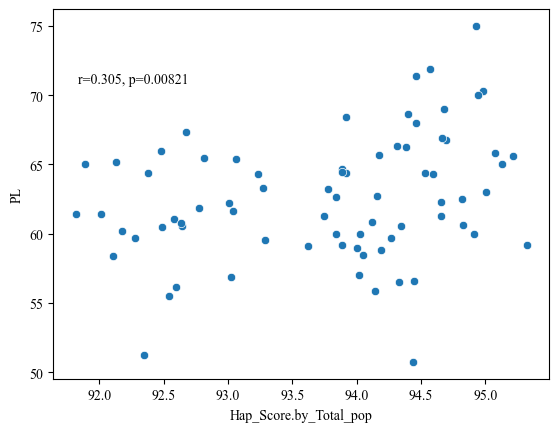

In [69]:
g = sns.scatterplot(x="Hap_Score.by_Total_pop", y="PL", data=data_con)
r, pvalue = stats.spearmanr(data_con["Hap_Score.by_Total_pop"].values, data_con["PL"], nan_policy="omit")
anno_label = 'r={:.3f}, p={:.3g}'.format(r, pvalue)
g.text(.05, .8, anno_label, transform=g.transAxes, font_properties=prop)

Text(0.05, 0.8, 'r=-0.023, p=0.848')

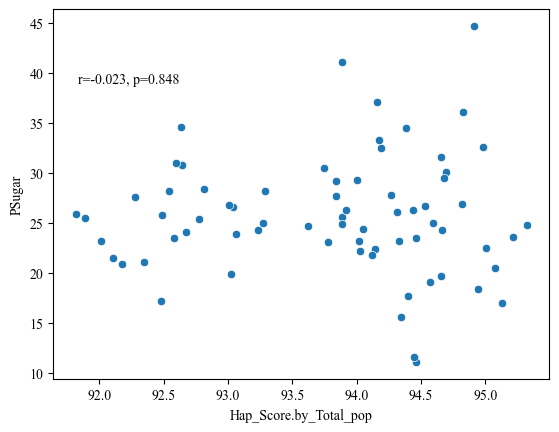

In [75]:
g = sns.scatterplot(x="Hap_Score.by_Total_pop", y="PSugar", data=data_con)
r, pvalue = stats.spearmanr(data_con["Hap_Score.by_VL_pop"].values, data_con["PSugar"], nan_policy="omit")
anno_label = 'r={:.3f}, p={:.3g}'.format(r, pvalue)
g.text(.05, .8, anno_label, transform=g.transAxes, font_properties=prop)